In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc # Ìè∞Ìä∏
#ÌïúÍ∏ÄÌè∞Ìä∏ Ï†ÅÏö©-----------------------------
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
#-----------------------------------------


from datetime import datetime
import time
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
# datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


C:\Users\monam\.conda\envs\basic\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\monam\.conda\envs\basic\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\monam\.conda\envs\basic\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [15]:
df = pd.read_excel(r'C:\Users\monam\Desktop\dataitgirls 6\ÌôïÎ•†Í≥º ÌÜµÍ≥ÑÏôÄ Ïã§Ìóò/today_score_data.xlsx')
df

cnt    name  today_score       date  dayofweek  dayofweek_check  \
0      1  quokka            9 2022-09-28          4                0   
1      2  quokka            6 2022-09-29          5                0   
2      3  quokka            4 2022-09-30          6                0   
3      4  quokka            7 2022-10-01          7                1   
4      5  quokka            7 2022-10-02          1                1   
..   ...     ...          ...        ...        ...              ...   
235  236  rabbit            7 2022-11-10          5                0   
236  237  rabbit            8 2022-11-11          6                0   
237  238  rabbit            9 2022-11-12          7                1   
238  239  rabbit            9 2022-11-13          1                1   
239  240  rabbit            9 2022-11-14          2                0   

     avg_temp  low_temp  high_temp  precipitation  ...  \
0        20.4      16.1       26.1            0.0  ...   
1        20.4      16.4       26.5            0.0  ...   
2        20.7      14.8       27.7            0.0  ...   
3        20.9      14.4       27.6            0.0  ...   
4        19.4      17.2       21.6           15.8  ...   
..        ...       ...        ...            ...  ...   
235      13.5       8.8       19.1            0.0  ...   
236      15.6      10.9       22.1            0.0  ...   
237      16.3      11.6       22.0           57.9  ...   
238      10.3       8.7       17.3            0.0  ...   
239       9.7       5.9       13.8            0.0  ...   

     yesterday_exercise_time  yesterday_step_cnt yesterday_drinking period  \
0                         70               11772                  0      0   
1                          0                5800                  0      0   
2                          0                2775                  0      0   
3                          0                4365                  0      0   
4                          0               13541                  0      0   
..                       ...                 ...                ...    ...   
235                        0                2800                  0      0   
236                        0                5503                  0      0   
237                        0                4261                  0      0   
238                        0                7500                  0      0   
239                        0                7651                  0      0   

     caffeine  yesterday_satisfaction  gotobed_range  getup_range  \
0           0                       2           03ÏãúÎåÄ         08ÏãúÎåÄ   
1           0                       3           03ÏãúÎåÄ         08ÏãúÎåÄ   
2           0                       4           05ÏãúÎåÄ         10ÏãúÎåÄ   
3           0                       3           05ÏãúÎåÄ         07ÏãúÎåÄ   
4           1                       4           03ÏãúÎåÄ         10ÏãúÎåÄ   
..        ...                     ...            ...          ...   
235         1                       3           00ÏãúÎåÄ         07ÏãúÎåÄ   
236         1                       4           01ÏãúÎåÄ         10ÏãúÎåÄ   
237         1                       3           20ÏãúÎåÄ         10ÏãúÎåÄ   
238         1                       4           02ÏãúÎåÄ         08ÏãúÎåÄ   
239         1                       3           00ÏãúÎåÄ         08ÏãúÎåÄ   

     gotobed_late  getup_early  
0               1            0  
1               1            0  
2               1            0  
3               1            1  
4               1            0  
..            ...          ...  
235             0            1  
236             0            0  
237             0            0  
238             1            0  
239             0            0  

[240 rows x 29 columns]

In [16]:
df = df[df.name == 'quokka']

In [17]:
# ÎÇ†Ïßú ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Î∞îÍøîÏ£ºÍ∏∞!
dayofweek = ['Ïùº', 'Ïõî', 'Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'ÌÜ†']
for i, day in zip(range(1,8), dayofweek):
        df['dayofweek'].loc[df.dayofweek == i] = day

In [18]:
df

cnt    name  today_score       date dayofweek  dayofweek_check  avg_temp  \
0     1  quokka            9 2022-09-28         Ïàò                0      20.4   
1     2  quokka            6 2022-09-29         Î™©                0      20.4   
2     3  quokka            4 2022-09-30         Í∏à                0      20.7   
3     4  quokka            7 2022-10-01         ÌÜ†                1      20.9   
4     5  quokka            7 2022-10-02         Ïùº                1      19.4   
5     6  quokka            8 2022-10-03         Ïõî                0      21.4   
6     7  quokka            6 2022-10-04         Ìôî                0      17.9   
7     8  quokka            8 2022-10-05         Ïàò                0      16.6   
8     9  quokka            5 2022-10-06         Î™©                0      15.8   
9    10  quokka            8 2022-10-07         Í∏à                0      14.3   
10   11  quokka            7 2022-10-08         ÌÜ†                1      15.8   
11   12  quokka            8 2022-10-09         Ïùº                1      13.1   
12   13  quokka            5 2022-10-10         Ïõî                0       9.9   
13   14  quokka            6 2022-10-11         Ìôî                0      11.1   
14   15  quokka            8 2022-10-12         Ïàò                0      13.5   
15   16  quokka            7 2022-10-13         Î™©                0      16.3   
16   17  quokka            6 2022-10-14         Í∏à                0      17.1   
17   18  quokka           10 2022-10-15         ÌÜ†                1      18.2   
18   19  quokka            9 2022-10-16         Ïùº                1      16.9   
19   20  quokka            5 2022-10-17         Ïõî                0      11.2   
20   21  quokka            7 2022-10-18         Ìôî                0       9.4   
21   22  quokka            8 2022-10-19         Ïàò                0      10.5   
22   23  quokka            6 2022-10-20         Î™©                0      12.9   
23   24  quokka            6 2022-10-21         Í∏à                0      14.0   
24   25  quokka            9 2022-10-22         ÌÜ†                1      15.1   
25   26  quokka            7 2022-10-23         Ïùº                1      14.0   
26   27  quokka            6 2022-10-24         Ïõî                0      10.6   
27   28  quokka            7 2022-10-25         Ìôî                0      11.3   
28   29  quokka           10 2022-10-26         Ïàò                0      12.9   
29   30  quokka            8 2022-10-27         Î™©                0      13.2   
30   31  quokka            6 2022-10-28         Í∏à                0      13.6   
31   32  quokka            8 2022-10-29         ÌÜ†                1      14.8   
32   33  quokka            6 2022-10-30         Ïùº                1      14.9   
33   34  quokka            6 2022-10-31         Ïõî                0      14.9   
34   35  quokka            5 2022-11-01         Ìôî                0      13.1   
35   36  quokka            6 2022-11-02         Ïàò                0      11.1   
36   37  quokka            3 2022-11-03         Î™©                0       9.3   
37   38  quokka            8 2022-11-04         Í∏à                0       4.9   
38   39  quokka            9 2022-11-05         ÌÜ†                1       6.5   
39   40  quokka            5 2022-11-06         Ïùº                1       9.6   
40   41  quokka            7 2022-11-07         Ïõî                0      11.4   
41   42  quokka            5 2022-11-08         Ìôî                0      12.9   
42   43  quokka           10 2022-11-09         Ïàò                0      11.4   
43   44  quokka            9 2022-11-10         Î™©                0      13.5   
44   45  quokka           10 2022-11-11         Í∏à                0      15.6   
45   46  quokka            8 2022-11-12         ÌÜ†                1      16.3   
46   47  quokka            9 2022-11-13         Ïùº                1      10.3   
47   48  quokka            7 2022-11-14         Ïõî                0  

Text(0.5, 1.0, 'qoukka Ïùò Ïò§ÎäòÏùò Ï†êÏàò plot')

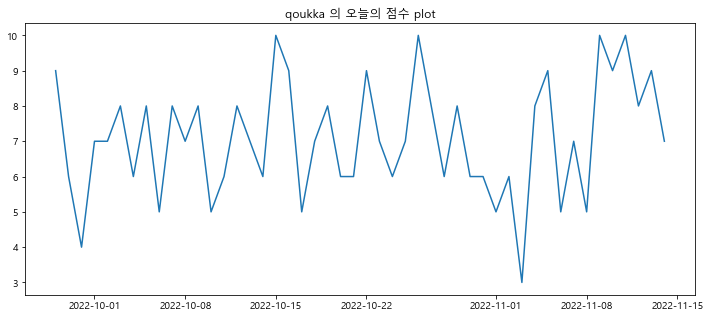

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df.date, df.today_score)
plt.title('qoukka Ïùò Ïò§ÎäòÏùò Ï†êÏàò plot')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     object        
 5   dayofweek_check          48 non-null     int64         
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     int64         
 11  class_check              48 non-null     int64         
 12  gotobed_time             48 non-null  

In [20]:
df.describe()

cnt  today_score  dayofweek_check   avg_temp   low_temp  high_temp  \
count  48.00    48.000000        48.000000  48.000000  48.000000  48.000000   
mean   24.50     7.083333         0.291667  13.929167   9.595833  19.250000   
std    14.00     1.660983         0.459340   3.762636   3.929591   4.017197   
min     1.00     3.000000         0.000000   4.900000   0.800000   9.800000   
25%    12.75     6.000000         0.000000  11.175000   6.650000  16.550000   
50%    24.50     7.000000         0.000000  13.550000   9.550000  19.100000   
75%    36.25     8.000000         1.000000  16.300000  11.800000  21.600000   
max    48.00    10.000000         1.000000  21.400000  17.500000  27.700000   

       precipitation  precipitation_check  class_check  sleep_time  ...  \
count      48.000000            48.000000    48.000000   48.000000  ...   
mean        3.792500             0.208333     0.750000  402.020833  ...   
std        14.023592             0.410414     0.437595  132.918867  ...   
min         0.000000             0.000000     0.000000  107.000000  ...   
25%         0.000000             0.000000     0.750000  307.250000  ...   
50%         0.000000             0.000000     1.000000  378.500000  ...   
75%         0.000000             0.000000     1.000000  462.500000  ...   
max        76.000000             1.000000     1.000000  850.000000  ...   

       sleep_score  yesterday_exercise  yesterday_exercise_time  \
count    48.000000           48.000000                48.000000   
mean      3.125000            0.187500                10.770833   
std       1.122782            0.394443                23.210635   
min       1.000000            0.000000                 0.000000   
25%       2.000000            0.000000                 0.000000   
50%       3.000000            0.000000                 0.000000   
75%       4.000000            0.000000                 0.000000   
max       5.000000            1.000000                78.000000   

       yesterday_step_cnt  yesterday_drinking     period   caffeine  \
count           48.000000           48.000000  48.000000  48.000000   
mean          6856.125000            0.104167   0.187500   0.375000   
std           4384.607931            0.308709   0.394443   0.489246   
min             28.000000            0.000000   0.000000   0.000000   
25%           4267.000000            0.000000   0.000000   0.000000   
50%           7109.000000            0.000000   0.000000   0.000000   
75%           9591.500000            0.000000   0.000000   1.000000   
max          18177.000000            1.000000   1.000000   1.000000   

       yesterday_satisfaction  gotobed_late  getup_early  
count               48.000000     48.000000    48.000000  
mean                 3.458333      0.687500     0.187500  
std                  0.944375      0.468417     0.394443  
min                  2.000000      0.000000     0.000000  
25%                  3.000000      0.000000     0.000000  
50%                  4.000000      1.000000     0.000000  
75%                  4.000000      1.000000     0.000000  
max                  5.000000      1.000000     1.000000  

[8 rows x 22 columns]

In [30]:
categorical = [col for col in df.columns if df[col].dtypes == 'object']

In [31]:
categorical

['name',
 'dayofweek',
 'gotobed_time',
 'getup_time',
 'gotobed_range',
 'getup_range']

In [78]:
# maxÍ∞íÏù¥ 1Ïù∏ Í≤É.. 0Í≥º 1Î°ú Íµ¨ÏÑ±Ìïú Ïπ¥ÌÖåÍ≥†Î¶¨Ïª¨Ïù¥ ÏïÑÎãêÍπå
categorical2 = [col for col in df.columns if df[col].max() == 1]

In [81]:
categorical = categorical + categorical2

In [85]:
categorical.remove('name')
categorical.remove('getup_time')
categorical.remove('gotobed_time')

In [86]:
categorical

['dayofweek',
 'gotobed_range',
 'getup_range',
 'dayofweek_check',
 'precipitation_check',
 'class_check',
 'morning_routine',
 'weather_prefer',
 'yesterday_exercise',
 'yesterday_drinking',
 'period',
 'caffeine',
 'gotobed_late',
 'getup_early']

# Î≤îÏ£ºÌòï Î≥ÄÏàò Î∂ÑÌè¨ ÏïåÏïÑÎ≥¥Í∏∞

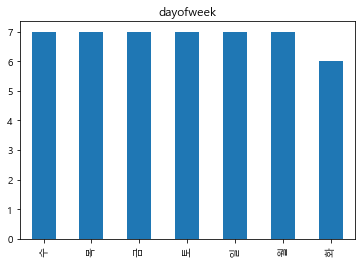

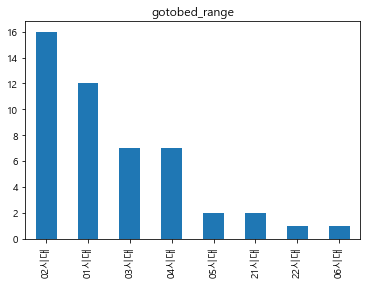

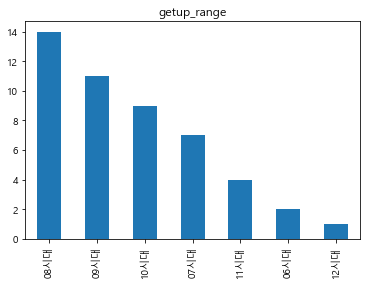

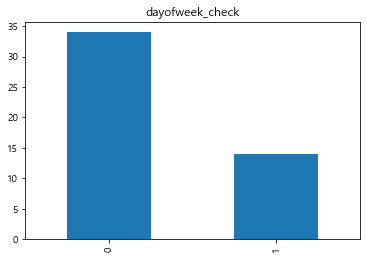

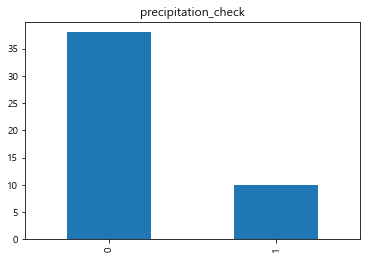

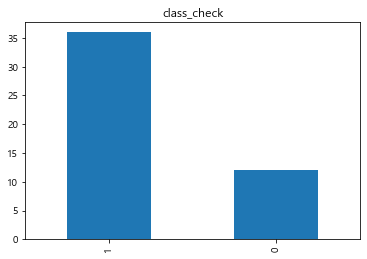

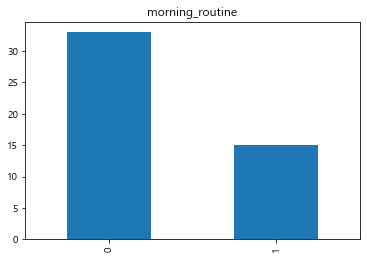

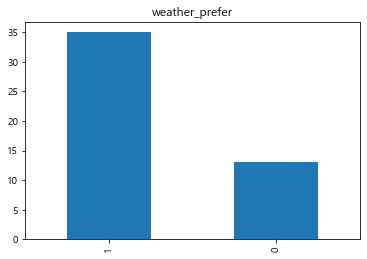

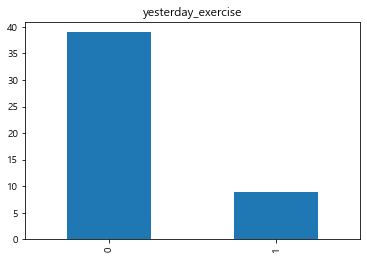

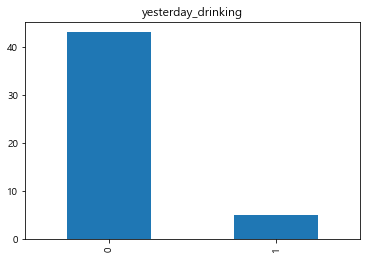

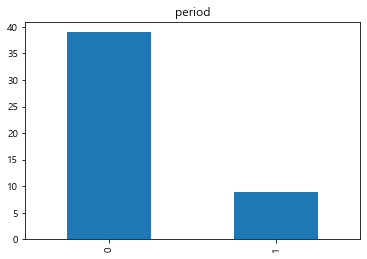

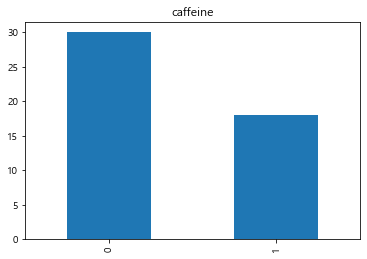

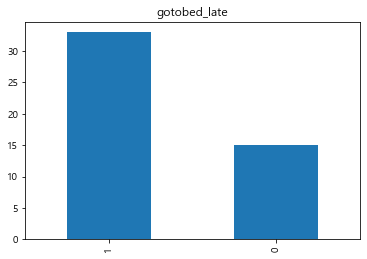

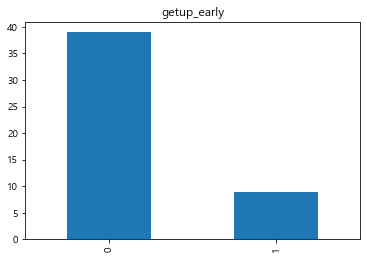

In [87]:
for col in categorical:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

quokka ÌäπÏßï:

- Ï£ºÎ°ú Ïû†ÎìúÎäî ÏãúÍ∞ÑÎåÄ: 2ÏãúÎåÄ
- Ï£ºÎ°ú ÏùºÏñ¥ÎÇú ÏãúÍ∞ÑÎåÄ: 8ÏãúÎåÄ
- Î™®ÎãùÎ£®Ìã¥ÏùÄ.. Ïïà Ìïú ÎÇ†Ïù¥ Ìïú ÎÇ†Ïùò Îëê Î∞∞ Ï†ïÎèÑ
- Ïö¥ÎèôÏùÑ Ïïà Ìïú ÎÇ†Ïù¥ Ìïú ÎÇ†Ïùò 3.5Î∞∞ Ï†ïÎèÑ
- ÏùåÏ£ºÎäî Í±∞Ïùò Ïïà Ìï® 5Ìöå ÎØ∏ÎßåÏúºÎ°ú Î≥¥ÏûÑ
- ÏïÑÏπ®Ïóê Ïª§ÌîºÎ•º Ïïà ÎßàÏãúÎäî ÎÇ†ÏùÄ ÎßàÏãúÎäî ÎÇ†Ïùò Îëê Î∞∞ Ï†ïÎèÑ
- Îã§Î•∏ ÌåÄÏõêÏóê ÎπÑÌï¥ ÎπÑÍµêÏ†Å Îä¶Í≤å ÏûêÎäî ÎÇ†Ïù¥ ÎßéÏùå
- Îã§Î•∏ ÌåÄÏõêÏóê ÎπÑÌï¥ ÎπÑÍµêÏ†Å Îä¶Í≤å ÏùºÏñ¥ÎÇòÎäî ÎÇ†Ïù¥ ÎßéÏùå

In [92]:
numerical = [col for col in df.columns if (df[col].dtypes == 'int64')|(df[col].dtypes == 'float64')]
numerical2 = [col for col in df.columns if (df[col].dtypes == 'object') | (df[col].max() != 1)]

In [95]:
numerical = numerical + numerical2

In [99]:
numerical

['dayofweek_check',
 'avg_temp',
 'low_temp',
 'high_temp',
 'precipitation',
 'precipitation_check',
 'class_check',
 'sleep_time',
 'morning_routine',
 'weather_prefer',
 'sleep_score',
 'yesterday_exercise',
 'yesterday_exercise_time',
 'yesterday_step_cnt',
 'yesterday_drinking',
 'period',
 'caffeine',
 'yesterday_satisfaction',
 'gotobed_late',
 'getup_early',
 'today_score',
 'avg_temp',
 'low_temp',
 'high_temp',
 'precipitation',
 'sleep_time',
 'sleep_score',
 'yesterday_exercise_time',
 'yesterday_step_cnt',
 'yesterday_satisfaction',
 'gotobed_range',
 'getup_range']

In [96]:
numerical.remove('cnt')
numerical.remove('name')
numerical.remove('date')
numerical.remove('today_score')
numerical.remove('dayofweek')
numerical.remove('gotobed_time')
numerical.remove('getup_time')

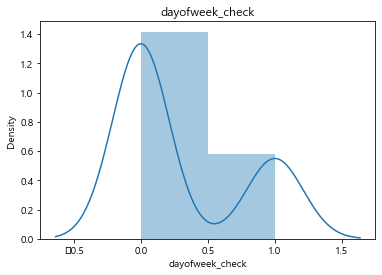

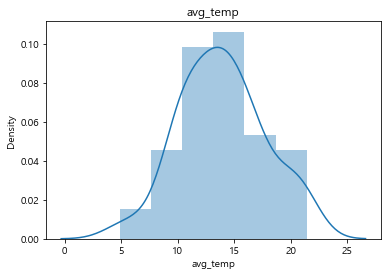

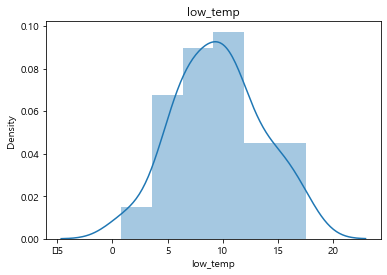

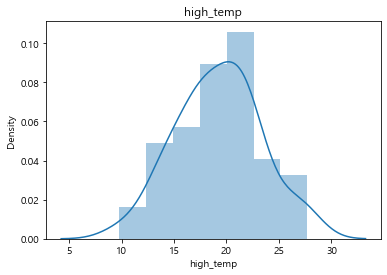

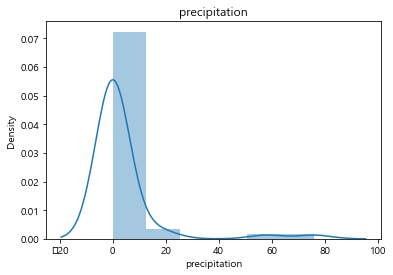

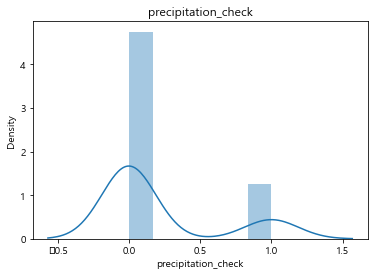

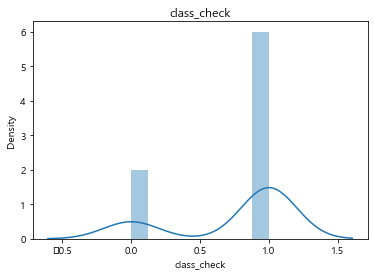

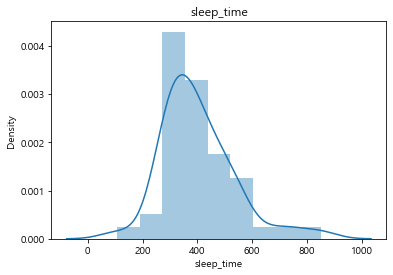

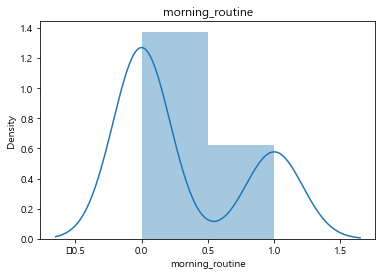

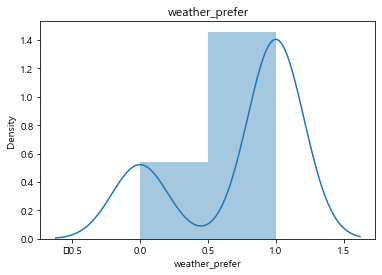

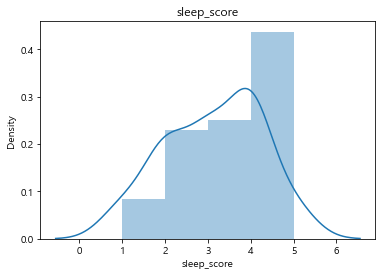

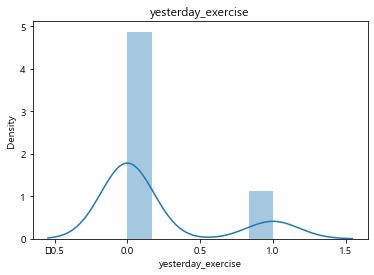

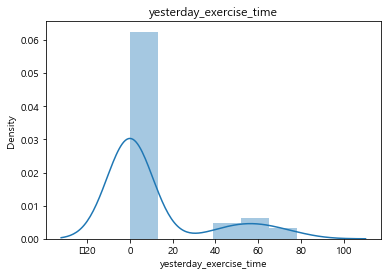

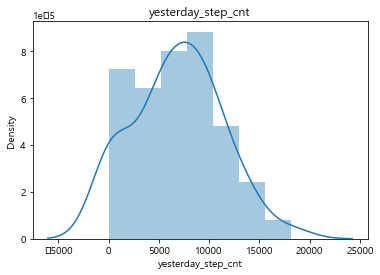

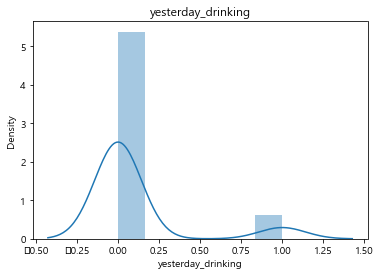

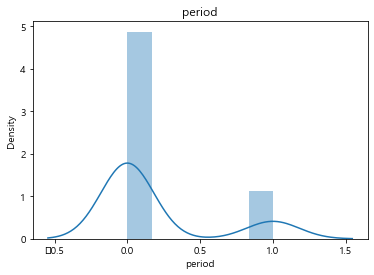

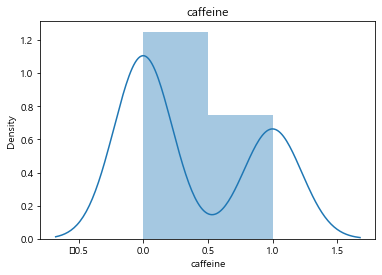

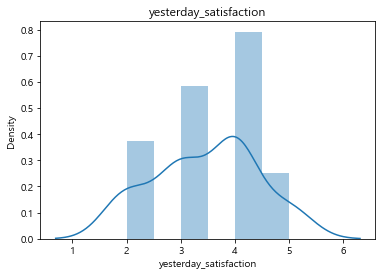

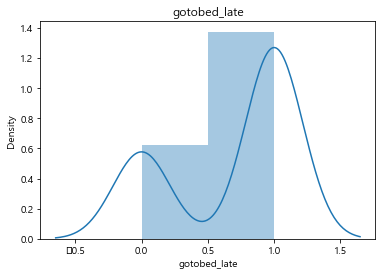

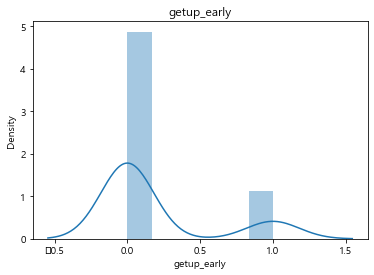

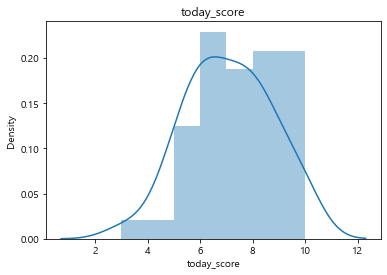

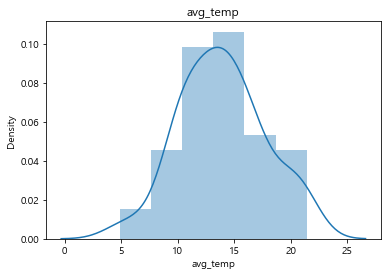

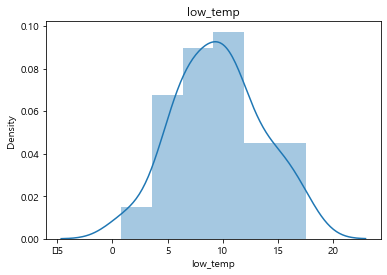

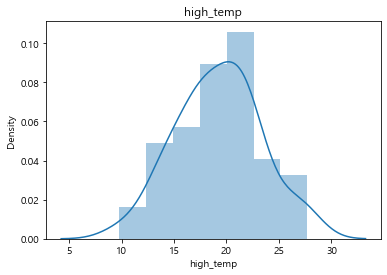

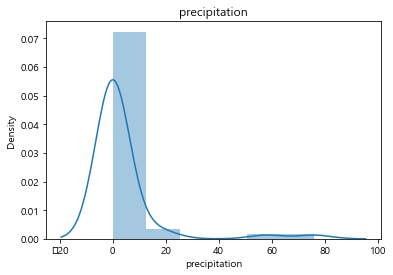

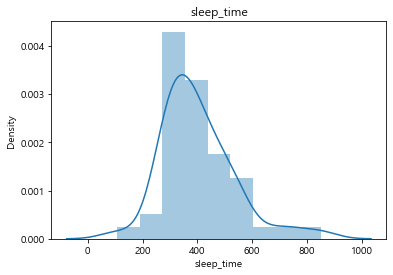

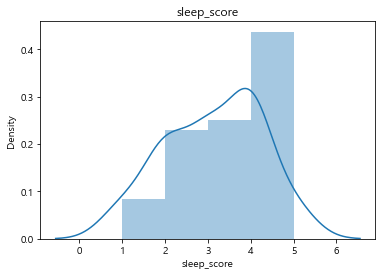

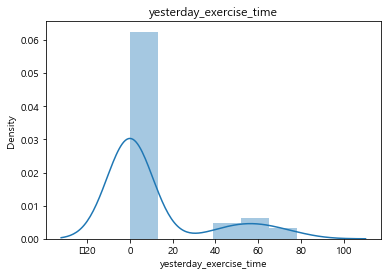

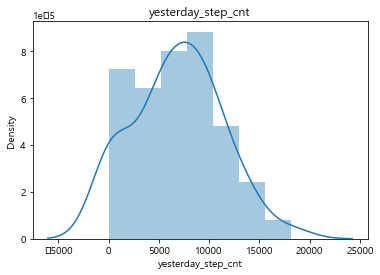

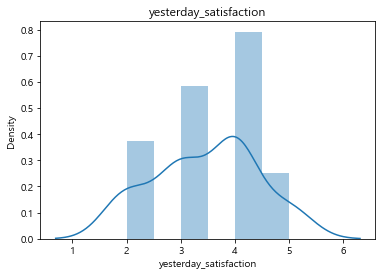

ValueError: could not convert string to float: '03ÏãúÎåÄ'

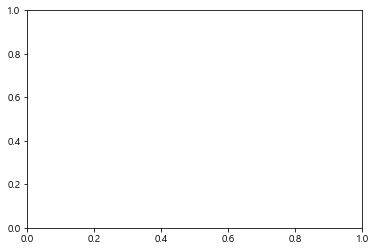

In [98]:
for col in numerical:
    sns.distplot(df.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()

quokka ÌäπÏßï:
- Ïû† ÏûêÎäî ÏãúÍ∞ÑÏùÄ 3-400Î∂ÑÎåÄ, ÏïΩ 6ÏãúÍ∞Ñ ~ 6ÏãúÍ∞Ñ Î∞ò Ï†ïÎèÑ Ïû†
- ÏàòÎ©¥ Ï†êÏàòÎäî 4Ï†êÎåÄÏóê ÎßéÏù¥ Î∂ÑÌè¨ÌïòÏßÄÎßå, 5Ï†êÏùÄ Ï†ÅÏùå
- Ïö¥ÎèôÌïòÎ©¥ 40Î∂Ñ ~ 80Î∂Ñ Ï†ïÎèÑ
- Í±∏Ïùå ÏàòÎäî 8Ï≤ú Î≥¥ Ï†ïÎèÑ
- Ïñ¥Ï†úÏùò ÎßåÏ°±ÎèÑÎäî 3~4Ï†ê Ï†ïÎèÑ
- Ïò§Îäò Ï†êÏàòÎäî 6Ï†êÏóê Í∞ÄÏû• ÎßéÏù¥ Î∂ÑÌè¨


## ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

In [101]:
df.corr()

cnt  today_score  dayofweek_check  avg_temp  \
cnt                      1.000000     0.139991         0.046320 -0.635629   
today_score              0.139991     1.000000         0.274223  0.067351   
dayofweek_check          0.046320     0.274223         1.000000  0.132851   
avg_temp                -0.635629     0.067351         0.132851  1.000000   
low_temp                -0.632331     0.050255         0.153925  0.942816   
high_temp               -0.502588     0.088965         0.138365  0.931777   
precipitation           -0.101043     0.116326         0.135440  0.331296   
precipitation_check     -0.225882    -0.182067         0.009405  0.162696   
class_check             -0.083351    -0.117091        -0.476331 -0.140206   
sleep_time               0.180052     0.432027         0.179019 -0.145790   
morning_routine         -0.384467     0.129897        -0.135968  0.220464   
weather_prefer           0.214888     0.030900        -0.227770 -0.224389   
sleep_score              0.173256     0.405014         0.299096 -0.078945   
yesterday_exercise       0.090544     0.170495         0.044037  0.169702   
yesterday_exercise_time  0.080504     0.246095         0.098202  0.190593   
yesterday_step_cnt       0.317077     0.229529         0.236926 -0.035859   
yesterday_drinking       0.287992     0.190182         0.081274  0.032132   
period                  -0.364101     0.040594         0.044037  0.056448   
caffeine                 0.037276    -0.039274         0.165683 -0.159789   
yesterday_satisfaction   0.061152     0.354928         0.126708  0.053640   
gotobed_late            -0.306601    -0.239283         0.037082  0.333638   
getup_early              0.163749     0.235446         0.044037 -0.048205   

                         low_temp  high_temp  precipitation  \
cnt                     -0.632331  -0.502588      -0.101043   
today_score              0.050255   0.088965       0.116326   
dayofweek_check          0.153925   0.138365       0.135440   
avg_temp                 0.942816   0.931777       0.331296   
low_temp                 1.000000   0.793192       0.352950   
high_temp                0.793192   1.000000       0.173421   
precipitation            0.352950   0.173421       1.000000   
precipitation_check      0.289469  -0.069687       0.532758   
class_check             -0.236947  -0.016945      -0.432005   
sleep_time              -0.127643  -0.167350       0.198145   
morning_routine          0.256177   0.119288       0.217701   
weather_prefer          -0.337027  -0.105552      -0.252693   
sleep_score             -0.126225  -0.033492       0.182836   
yesterday_exercise       0.133665   0.173886       0.091459   
yesterday_exercise_time  0.147489   0.204331       0.091374   
yesterday_step_cnt      -0.030484  -0.015912      -0.010018   
yesterday_drinking       0.026674   0.031740       0.191364   
period                   0.058168   0.006042      -0.052783   
caffeine                -0.088812  -0.245741      -0.099344   
yesterday_satisfaction   0.058433   0.065057       0.031079   
gotobed_late             0.374946   0.264018       0.184193   
getup_early             -0.110673  -0.016784      -0.131289   

                         precipitation_check  class_check  sleep_time  ...  \
cnt                                -0.225882    -0.083351    0.180052  ...   
today_score                        -0.182067    -0.117091    0.432027  ...   
dayofweek_check                     0.009405    -0.476331    0.179019  ...   
avg_temp                            0.162696    -0.140206   -0.145790  ...   
low_temp                            0.289469    -0.236947   -0.127643  ...   
high_temp                          -0.069687    -0.016945   -0.167350  ...   
precipitation                       0.532758    -0.432005    0.198145  ...   
precipitation_check                 1.000000    -0.296174    0.033461  ...   
class_check                        -0.296174     1.000000   -0.092456  ...   
sleep_time                  

<AxesSubplot:>

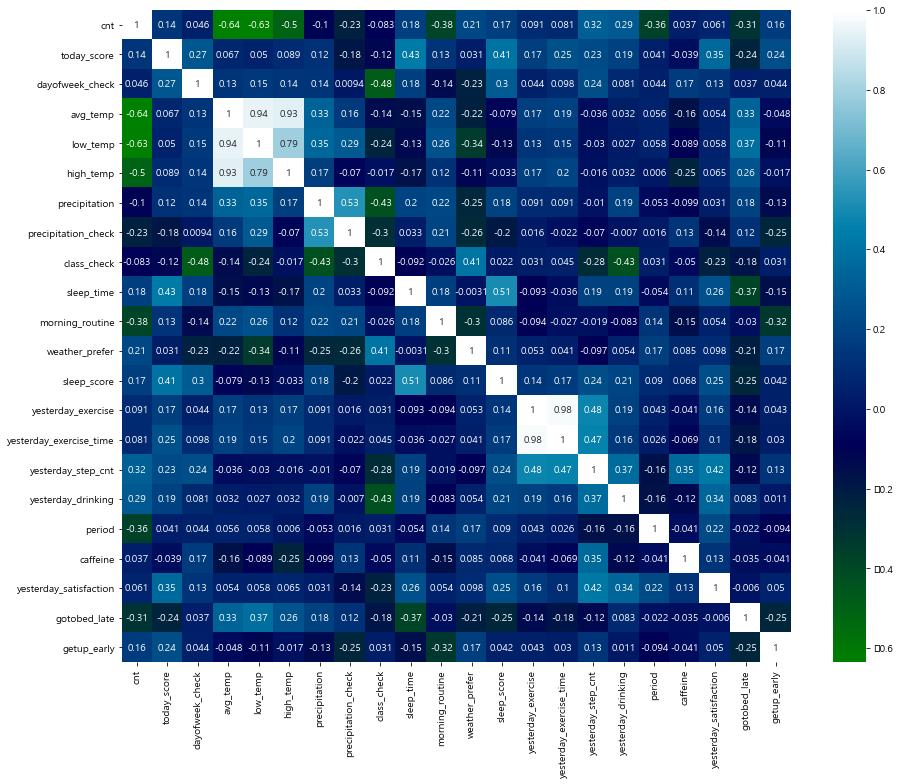

In [108]:
plt.figure(figsize=(15,12))
sns.heatmap(data=df.corr(),annot=True, cmap='ocean')

ÌÅ∞ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Îäî Î≥ÄÏàò
- sleep_time, today_score (0.41)
- yesterday_satisfaction, today_score (0.35)
- sleep_score, sleep_time (0.51)
- gotobed_late, sleep_time (-0.37)
- yesterday_excercise, yesterday_excercise_time (0.98) „Öã„Öã
- yesterday_excercise, yesterday_step_cnt (0.48)
- yesterday_step_cnt, yesterday_drinking (0.37) -> Ïà†ÏùÑ ÎßàÏãúÎ©¥ ÎßéÏù¥ Í±∑ÎäîÎã§??????
- yesterday_step_cnt, yesterday_satisfaction (0.42)
- getup_early, sleep_time (-0.32)

In [113]:
# Ïù¥Ï†úÏôÄÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàò object ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω
df['dayofweek'] = df['dayofweek'].astype(object)
df['dayofweek_check'] = df['dayofweek_check'].astype(object)
df['class_check'] = df['class_check'].astype(object)
df['morning_routine'] = df['morning_routine'].astype(object)
df['weather_prefer'] = df['weather_prefer'].astype(object)
df['yesterday_exercise'] = df['yesterday_exercise'].astype(object)
df['yesterday_drinking'] = df['yesterday_drinking'].astype(object)
df['period'] = df['period'].astype(object)
df['caffeine'] = df['caffeine'].astype(object)
df['precipitation_check'] = df['precipitation_check'].astype(object)
df['gotobed_late'] = df['gotobed_late'].astype(object)
df['getup_early'] = df['getup_early'].astype(object)

# ÌöåÍ∑Ä Î∂ÑÏÑù

In [112]:
df.columns

Index(['cnt', 'name', 'today_score', 'date', 'dayofweek', 'dayofweek_check',
       'avg_temp', 'low_temp', 'high_temp', 'precipitation',
       'precipitation_check', 'class_check', 'gotobed_time', 'getup_time',
       'sleep_time', 'morning_routine', 'weather_prefer', 'sleep_score',
       'yesterday_exercise', 'yesterday_exercise_time', 'yesterday_step_cnt',
       'yesterday_drinking', 'period', 'caffeine', 'yesterday_satisfaction',
       'gotobed_range', 'getup_range', 'gotobed_late', 'getup_early'],
      dtype='object')

ÎÇ†Ïßú Í¥ÄÎ†®: dayofweek

ÎÇ†Ïî® Í¥ÄÎ†®: avg_temp + percipitation + percifitation_check

Ïû† Í¥ÄÎ†®: sleep_time

gotobed_range + getup_range

ÏàòÏóÖ: class_check

Î™®ÎãùÎ£®Ìã¥: morning_routine

ÏàòÎ©¥ Ï†êÏàò: sleep_score

## ÏöîÏùºÎ≥Ñ Î∂ÑÏÑù

Í∞ÄÏÑ§: Ï£ºÎßêÏóê Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§

- p-valueÍ∞Ä 0.05Î≥¥Îã§ ÏûëÏùÄ Í∞íÏùÄ ÏóÜÏùå

In [143]:
m = ols('today_score ~ C(dayofweek)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     2.981
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0165
Time:                        00:44:02   Log-Likelihood:                -83.272
No. Observations:                  48   AIC:                             180.5
Df Residuals:                      41   BIC:                             193.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.8571      0.561     12.226      0.000       5.724       7.990
C(dayofweek)[T.Î™©]    -0.5714      0.793     -0.720      0.475      -2.173       1.030
C(dayofweek)[T.Ïàò]     1.5714      0.793      1.981      0.054      -0.030       3.173
C(dayofweek)[T.Ïõî]    -0.5714      0.793     -0.720      0.475      -2.173       1.030
C(dayofweek)[T.Ïùº]     0.4286      0.793      0.540      0.592      -1.173       2.030
C(dayofweek)[T.ÌÜ†]     1.4286      0.793      1.801      0.079      -0.173       3.030
C(dayofweek)[T.Ìôî]    -0.8571      0.826     -1.038      0.305      -2.524       0.810
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.122
Skew:                          -0.087   Prob(JB):                        0.941
Kurtosis:                       2.825   Cond. No.                         7.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ÏàòÎ©¥ ÏãúÍ∞Ñ

- ÏàòÎ©¥ ÏãúÍ∞ÑÏù¥ Í∏∏ÏàòÎ°ù Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§

- ÍµâÏû•Ìûà Ïú†ÏùòÌïú p-valueÎ•º Î≥¥ÏûÑ
- Î™®Îç∏ ÏÑ§Î™ÖÎ†•ÏùÄ 18.7%
- 1Î∂Ñ Îçî Ïûò ÏàòÎ°ù 0.0054Ï†ê Ï¶ùÍ∞Ä

In [117]:
m = ols('today_score ~ sleep_time', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     10.56
Date:                Fri, 25 Nov 2022   Prob (F-statistic):            0.00217
Time:                        00:03:37   Log-Likelihood:                -87.001
No. Observations:                  48   AIC:                             178.0
Df Residuals:                      46   BIC:                             181.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9129      0.703      6.990      0.000       3.498       6.328
sleep_time     0.0054      0.002      3.249      0.002       0.002       0.009
==============================================================================
Omnibus:                        0.641   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.125
Skew:                          -0.009   Prob(JB):                        0.939
Kurtosis:                       3.249   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ÏàòÎ©¥ ÏãúÍ∞ÑÎåÄ

- ÏàòÎ©¥ ÏãúÍ∞ÑÎåÄÍ∞Ä Îä¶ÏùÑÏàòÎ°ù Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù

In [142]:
m = ols('today_score ~ C(gotobed_range)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2.336
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0426
Time:                        00:43:33   Log-Likelihood:                -83.735
No. Observations:                  48   AIC:                             183.5
Df Residuals:                      40   BIC:                             198.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.2500      0.438     16.556      0.000       6.365       8.135
C(gotobed_range)[T.02ÏãúÎåÄ]     0.1875      0.579      0.324      0.748      -0.983       1.358
C(gotobed_range)[T.03ÏãúÎåÄ]    -0.2500      0.721     -0.347      0.731      -1.708       1.208
C(gotobed_range)[T.04ÏãúÎåÄ]    -1.3929      0.721     -1.931      0.061      -2.851       0.065
C(gotobed_range)[T.05ÏãúÎåÄ]    -1.7500      1.159     -1.510      0.139      -4.092       0.592
C(gotobed_range)[T.06ÏãúÎåÄ]    -2.2500      1.579     -1.425      0.162      -5.441       0.941
C(gotobed_range)[T.21ÏãúÎåÄ]     2.2500      1.159      1.942      0.059      -0.092       4.592
C(gotobed_range)[T.22ÏãúÎåÄ]     1.7500      1.579      1.108      0.274      -1.441       4.941
==============================================================================
Omnibus:                        2.035   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.134
Skew:                          -0.248   Prob(JB):                        0.567
Kurtosis:                       3.566   Cond. No.                         8.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ÏùºÏñ¥ÎÇú ÏãúÍ∞ÑÎåÄ
- ÏùºÏ∞ç ÏùºÏñ¥ÎÇ†ÏàòÎ°ù Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÇÆÏùÑ Í≤ÉÏù¥Îã§
- Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù

In [140]:
m = ols('today_score ~ C(getup_range)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.627
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.164
Time:                        00:43:12   Log-Likelihood:                -86.834
No. Observations:                  48   AIC:                             187.7
Df Residuals:                      41   BIC:                             200.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.0000      1.130      7.079      0.000       5.718      10.282
C(getup_range)[T.07ÏãúÎåÄ]    -0.1429      1.281     -0.111      0.912      -2.731       2.445
C(getup_range)[T.08ÏãúÎåÄ]    -1.2143      1.208     -1.005      0.321      -3.654       1.226
C(getup_range)[T.09ÏãúÎåÄ]    -1.3636      1.229     -1.110      0.274      -3.845       1.118
C(getup_range)[T.10ÏãúÎåÄ]    -1.5556      1.249     -1.245      0.220      -4.079       0.968
C(getup_range)[T.11ÏãúÎåÄ]     0.7500      1.384      0.542      0.591      -2.045       3.545
C(getup_range)[T.12ÏãúÎåÄ]  -9.12e-16      1.957  -4.66e-16      1.000      -3.953       3.953
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.350
Skew:                           0.126   Prob(JB):                        0.839
Kurtosis:                       2.666   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Î™®Îãù Î£®Ìã¥

- Î™®ÎãùÎ£®Ìã¥ÏùÑ ÌñàÏùÑ Îïå Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù


In [139]:
m = ols('today_score ~ C(morning_routine)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7895
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.379
Time:                        00:43:01   Log-Likelihood:                -91.551
No. Observations:                  48   AIC:                             187.1
Df Residuals:                      46   BIC:                             190.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.9394      0.290     23.946      0.000       6.356       7.523
C(morning_routine)[T.1]     0.4606      0.518      0.889      0.379      -0.583       1.504
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.449
Skew:                          -0.026   Prob(JB):                        0.799
Kurtosis:                       2.529   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ÏàòÎ©¥ Ï†êÏàò

- ÏàòÎ©¥ Ï†êÏàòÍ∞Ä ÎÜíÏùÑÏàòÎ°ù Ïò§ÎäòÏùò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§

- ÍµâÏû•Ìûà Ïú†ÏùòÌïú p-valueÎ•º Î≥¥ÏûÑ
- Î™®Îç∏ ÏÑ§Î™ÖÎ†•ÏùÄ 16.4%
- ÏàòÎ©¥Ï†êÏàò 1Ï†êÎãπ 0.59Ï†ê Ï¶ùÍ∞Ä

In [121]:
m = ols('today_score ~ sleep_score', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     9.026
Date:                Fri, 25 Nov 2022   Prob (F-statistic):            0.00430
Time:                        00:03:40   Log-Likelihood:                -87.659
No. Observations:                  48   AIC:                             179.3
Df Residuals:                      46   BIC:                             183.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.2110      0.661      7.878      0.000       3.880       6.542
sleep_score     0.5992      0.199      3.004      0.004       0.198       1.001
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.299
Skew:                           0.338   Prob(JB):                        0.522
Kurtosis:                       2.562   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ï†ÑÎÇ† Ïö¥Îèô
- Ï†ÑÎÇ† Ïö¥Îèô ÌïòÍ≥†, Í∑∏ ÏãúÍ∞ÑÏù¥ Í∏∏ ÏàòÎ°ù Ïò§Îäò Ï†êÏàòÍ∞Ä Ï¢ãÏùÑ Í≤ÉÏù¥Îã§

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù.. ü•≤
- ÎÇòÎäî ÎÇòÎ•º ÎØøÏóàÎäîÎç∞...

In [138]:
m = ols('today_score ~ C(yesterday_exercise)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.377
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.247
Time:                        00:42:37   Log-Likelihood:                -91.251
No. Observations:                  48   AIC:                             186.5
Df Residuals:                      46   BIC:                             190.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      6.9487      0.265     26.231      0.000       6.415       7.482
C(yesterday_exercise)[T.1]     0.7179      0.612      1.174      0.247      -0.514       1.949
==============================================================================
Omnibus:                        0.393   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.557
Skew:                          -0.093   Prob(JB):                        0.757
Kurtosis:                       2.506   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
m = ols('today_score ~ yesterday_exercise_time', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.965
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0918
Time:                        00:21:40   Log-Likelihood:                -90.460
No. Observations:                  48   AIC:                             184.9
Df Residuals:                      46   BIC:                             188.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.8936      0.259     26.573      0.000       6.371       7.416
yesterday_exercise_time     0.0176      0.010      1.722      0.092      -0.003       0.038
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.350
Skew:                          -0.063   Prob(JB):                        0.839
Kurtosis:                       2.601   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ï†ÑÎÇ† Í±∏ÏùåÏàò
- Ï†ÑÎÇ† ÎßéÏù¥ Í±∏ÏùÑÏàòÎ°ù Ïò§Îäò ÎÇòÏùò Ï†êÏàòÍ∞Ä Ï¢ãÏùÑ Í≤ÉÏù¥Îã§

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù

In [125]:
m = ols('today_score ~ yesterday_step_cnt', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.558
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.117
Time:                        00:22:48   Log-Likelihood:                -90.661
No. Observations:                  48   AIC:                             185.3
Df Residuals:                      46   BIC:                             189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4872      0.441     14.708      0.000       5.599       7.375
yesterday_step_cnt  8.695e-05   5.44e-05      1.599      0.117   -2.25e-05       0.000
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.796
Skew:                          -0.149   Prob(JB):                        0.672
Kurtosis:                       2.444   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Ï†ÑÎÇ† ÎßåÏ°±ÎèÑ
- Ïñ¥Ï†ú Í∏∞Î∂ÑÏù¥ Ï¢ãÏúºÎ©¥ Ïò§Îäò ÎÇòÏùò Ï†êÏàòÎèÑ ÎÜíÏùÑ Í≤ÉÏù¥Îã§

- Î™®Îç∏ ÏÑ§Î™ÖÎ†• 12%

In [127]:
m = ols('today_score ~ yesterday_satisfaction', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     6.630
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0133
Time:                        00:28:49   Log-Likelihood:                -88.728
No. Observations:                  48   AIC:                             181.5
Df Residuals:                      46   BIC:                             185.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.9245      0.869      5.670      0.000       3.176       6.673
yesterday_satisfaction     0.6243      0.242      2.575      0.013       0.136       1.112
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.477
Skew:                          -0.019   Prob(JB):                        0.788
Kurtosis:                       2.513   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ÎÇ†Ïî® Í¥ÄÎ†®
- ÎÇ†Ïî®Î•º ÏÑ†Ìò∏ÌïòÎ©¥ Ïò§Îäò Ï†êÏàòÍ∞Ä ÎÜíÏùÑ Í≤ÉÏù¥Îã§

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù

In [137]:
m = ols('today_score ~ C(weather_prefer)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.04396
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.835
Time:                        00:42:07   Log-Likelihood:                -91.937
No. Observations:                  48   AIC:                             187.9
Df Residuals:                      46   BIC:                             191.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.0000      0.465     15.040      0.000       6.063       7.937
C(weather_prefer)[T.1]     0.1143      0.545      0.210      0.835      -0.983       1.211
==============================================================================
Omnibus:                        0.412   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.814   Jarque-Bera (JB):                0.571
Skew:                          -0.098   Prob(JB):                        0.752
Kurtosis:                       2.503   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ÏùºÏ∞ç ÏùºÏñ¥ÎÇ® (getup_early)

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù

In [136]:
m = ols('today_score ~ C(getup_early)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.700
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.107
Time:                        00:41:56   Log-Likelihood:                -90.591
No. Observations:                  48   AIC:                             185.2
Df Residuals:                      46   BIC:                             188.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8974      0.261     26.398      0.000       6.371       7.423
C(getup_early)[T.1]     0.9915      0.603      1.643      0.107      -0.223       2.206
==============================================================================
Omnibus:                        0.875   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.815
Skew:                          -0.014   Prob(JB):                        0.665
Kurtosis:                       2.362   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Îä¶Í≤å Ïû† (gotobed_late)

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù

In [135]:
m = ols('today_score ~ C(gotobed_late)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.794
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.101
Time:                        00:41:46   Log-Likelihood:                -90.544
No. Observations:                  48   AIC:                             185.1
Df Residuals:                      46   BIC:                             188.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.6667      0.421     18.215      0.000       6.819       8.514
C(gotobed_late)[T.1]    -0.8485      0.508     -1.671      0.101      -1.870       0.173
==============================================================================
Omnibus:                        1.204   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.641
Skew:                          -0.268   Prob(JB):                        0.726
Kurtosis:                       3.184   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ÏµúÏ¢Ö ÌöåÍ∑ÄÏãù

- Ïã§Ï†úÎ°ú ÏòÅÌñ•ÏùÑ ÎÅºÏπú Í≤ÉÏùÄ ÏàòÎ©¥ Í¥ÄÎ†®Ìïú Í≤É Ï†ïÎèÑ

- Îä¶Í≤å ÏûêÍ±∞ÎÇò ÏùºÏ∞ç ÏùºÏñ¥ÎÇú Í≤ÉÎèÑ ÏòÅÌñ•Ïù¥ ÏóÜÍ≥†

- Ïö¥ÎèôÏùÑ ÎßéÏù¥ Ìï¥ÎèÑ ÏÉÅÍ¥ÄÏù¥ ÏóÜÍ≥†

- Î™®ÎãùÎ£®Ìã¥ÎèÑ ÏÉÅÍ¥ÄÏù¥ ÏóÜÍ≥†...

- Í∑∏Ï†Ä Ïûò ÏûêÎ©¥ Í∏∞Î∂ÑÏù¥ Ï¢ãÏùÄ ÏÇ¨Îûå

- Í∑∏Î¶¨Í≥† Ï†ÑÎÇ†ÏùÑ Ïûò Î≥¥ÎÇ¥Ïïº ÌïúÎã§

In [134]:
m = ols('today_score ~ yesterday_satisfaction + sleep_time', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     7.511
Date:                Fri, 25 Nov 2022   Prob (F-statistic):            0.00153
Time:                        00:41:12   Log-Likelihood:                -85.047
No. Observations:                  48   AIC:                             176.1
Df Residuals:                      45   BIC:                             181.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.6628      0.935      3.916      0.000       1.779       5.547
yesterday_satisfaction     0.4591      0.235      1.954      0.057      -0.014       0.932
sleep_time                 0.0046      0.002      2.731      0.009       0.001       0.008
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.251
Skew:                           0.149   Prob(JB):                        0.882
Kurtosis:                       3.192   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""